In [1]:
import numpy as np
import struct
import mglearn

C:\Users\cnyin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\cnyin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
def loadImageSet(filename):
    binfile = open(filename, 'rb')
    buffers = binfile.read()
    
    head = struct.unpack_from('>IIII', buffers, 0)
    offset = struct.calcsize('>IIII')
    
    imgNum = head[1]
    width = head[2]
    height = head[3]
    
    bits = imgNum * width * height
    bitsString = '>' + str(bits) + 'B'
    
    imgs = struct.unpack_from(bitsString, buffers, offset)
    binfile.close()
    imgs = np.reshape(imgs, [imgNum, width * height])
    
    return imgs

def loadLabelSet(filename):
    
    binfile = open(filename, 'rb')
    buffers = binfile.read()
    
    head = struct.unpack_from('>II', buffers, 0)
    
    labelNum = head[1]
    offset = struct.calcsize('>II')
    
    numString = '>' + str(labelNum) + "B"
    labels = struct.unpack_from(numString, buffers, offset)
    
    binfile.close()
    labels = np.reshape(labels, [labelNum])
    
    return labels

In [3]:
imgs = loadImageSet('MNIST/train-images.idx3-ubyte')
labels = loadLabelSet('MNIST/train-labels.idx1-ubyte')

In [4]:
from sklearn.manifold import SpectralEmbedding

embedding = SpectralEmbedding(n_components=3)

In [5]:
from time import time

start = time()
X_transformed = embedding.fit_transform(imgs[:1000])
print("time cost: {:.2f}s".format(time()-start))

time cost: 6.31s


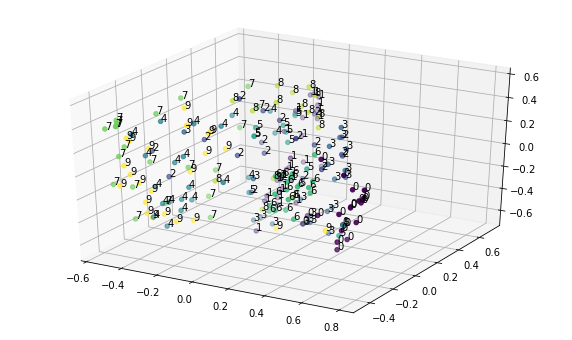

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter(X_transformed[:200, 0]*100, X_transformed[:200, 1]*100, X_transformed[:200, 2]*100, c=labels[:200])
for i in range(200):
    ax.text(X_transformed[i, 0]*100, X_transformed[i, 1]*100, X_transformed[i, 2]*100, labels[i])

In [13]:
def distance_metric(X, labels):
    dist = np.zeros((10, 10))
    for i in range(10):
        for j in range(10):
            dist[i, j] = distance(X[labels==j], cluster_center(X[labels==i])).mean()
    return dist

def cluster_center(X):
    return X.mean(axis=0)

def distance(X, center):
    return np.sqrt(((X - center) ** 2).sum(axis=1))

def concentration(metric):
    return metric.shape[0]*metric.diagonal().sum()/metric.sum()

In [14]:
metric = distance_metric(X_transformed, labels[:1000])

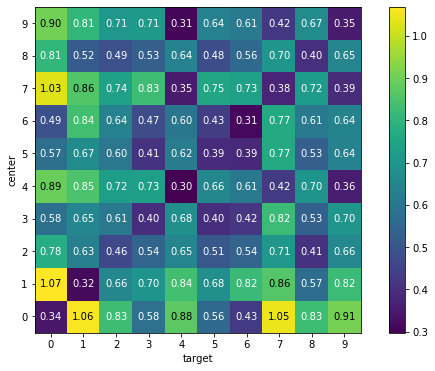

In [19]:
plt.figure(figsize=(10,6))
image = mglearn.tools.heatmap(metric*100, xlabel="target", ylabel="center", xticklabels=range(10), yticklabels=range(10), cmap="viridis")
plt.colorbar(image)

In [16]:
concentration(metric)

0.5826806345384081